In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
DATA_DIR = Path("data")
DANES_ROOT = DATA_DIR / Path("imm_face_db")
IBUG_ROOT = DATA_DIR / Path("ibug_300W_large_face_landmark_dataset")
train_xml = IBUG_ROOT / Path("labels_ibug_300W_train.xml")
test_xml = IBUG_ROOT / Path("labels_ibug_300W_test_parsed.xml")

assert DATA_DIR.exists()
assert DANES_ROOT.exists()
assert IBUG_ROOT.exists()

In [72]:
%%capture
if not IBUG_ROOT.exists():
    !wget https://people.eecs.berkeley.edu/~zhecao/ibug_300W_large_face_landmark_dataset.zip
    !unzip 'data ibug_300W_large_face_landmark_dataset.zip'    
    !rm -r 'ibug_300W_large_face_landmark_dataset.zip'
    !mv ibug_300W_large_face_landmark_dataset data

In [73]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from data import (
    FaceKeypointsTrainDataset,
    FaceKeypointsValidDataset,
    LargeTestDataset,
    LargeTrainDataset,
    LargeValidDataset,
    NoseKeypointTrainDataset,
    NoseKeypointValidDataset,
    part1_augment,
    part2_augment,
    part3_augment,
)
from display import show_keypoints, show_progress
from learn import test, train, train_and_validate, validate

# Part 1

In [74]:
training_set1 = NoseKeypointTrainDataset()
validation_set1 = NoseKeypointValidDataset()


assert len(training_set1) == 192, len(training_set1)
assert len(validation_set1) == 48, len(validation_set1)

In [75]:
batch_size = 64
train_loader1 = DataLoader(training_set1, batch_size=batch_size, shuffle=True)
valid_loader1 = DataLoader(validation_set1, batch_size=batch_size, shuffle=False)

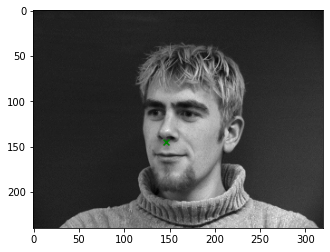

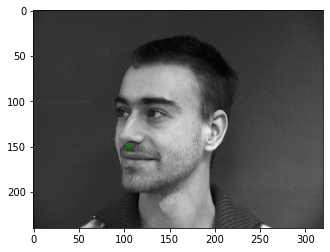

In [76]:
show_keypoints(training_set1[2][0], training_set1[2][1])
show_keypoints(training_set1[134][0], training_set1[134][1])

  0%|          | 0/1 [00:00<?, ?it/s]

batch0 0.011925539933145046


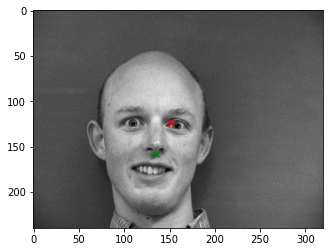

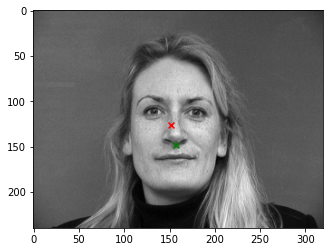

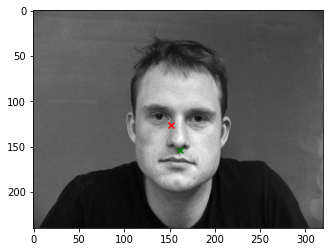

100%|██████████| 1/1 [00:03<00:00,  3.52s/it]


0.012588312228520712


In [38]:
# Training and Testing

model1 = cnn.NoseFinder()
epochs = 1
learn_rate = 3e-4
show_every = 1

train_loss1, valid_loss1 = train_and_validate(
    train_loader1, valid_loader1, model1, epochs, learn_rate, show_every
)

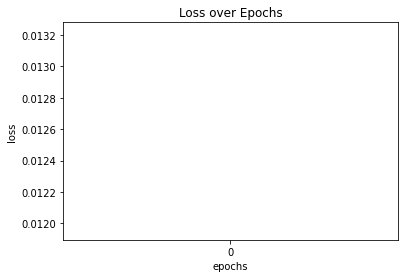

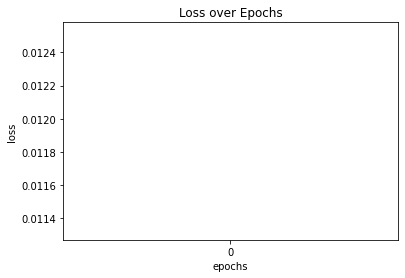

In [39]:
# Plot training and validation loss progress
show_progress(train_loss1)
show_progress(valid_loss1)

In [40]:
results1, _ = validate(valid_loader1, model1, show_every=None)

batch0 0.011925539933145046



In [41]:
# TODO pick success and failure cases to display

# Part 2

In [42]:
training_set2 = FaceKeypointsTrainDataset()
validation_set2 = FaceKeypointsValidDataset()

assert len(training_set2) == 192
assert len(validation_set2) == 48
# Initialize Dataloaders

batch_size = 64
train_loader2 = DataLoader(training_set2, batch_size=batch_size, shuffle=True)
valid_loader2 = DataLoader(validation_set2, batch_size=batch_size, shuffle=False)

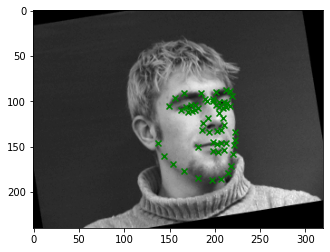

In [43]:
# Plotting a few input images and their face keypoints.

sample = training_set2[3]
image, points = sample
show_keypoints(image, points)

  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([64, 1, 240, 320])
torch.Size([64, 25, 21, 30])
torch.Size([64, 1, 240, 320])
torch.Size([64, 25, 21, 30])
torch.Size([64, 1, 240, 320])
torch.Size([64, 25, 21, 30])



torch.Size([48, 1, 240, 320])
torch.Size([48, 25, 21, 30])
batch0 0.01743847131729126


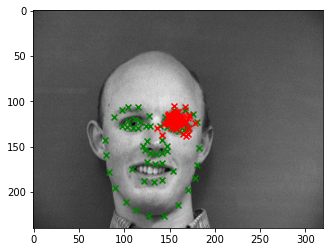

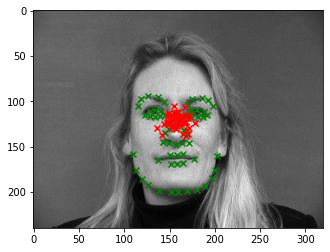

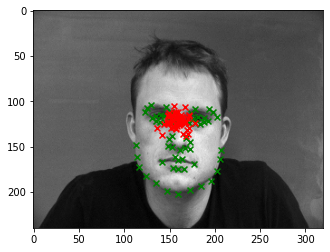

100%|██████████| 1/1 [00:04<00:00,  4.19s/it]


0.016126931955416996


In [48]:
# Training and Testing

model2 = cnn.FaceFinder()
epochs = 1
learn_rate = 3e-4
show_every = 3

train_loss2, valid_loss2 = train_and_validate(
    train_loader2, valid_loader2, model2, epochs, learn_rate, show_every
)

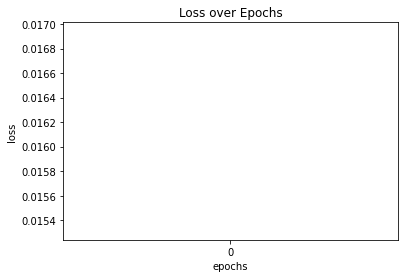

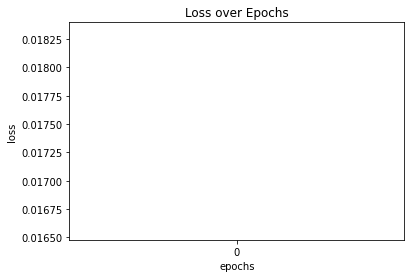

In [49]:
# Plot training and validation loss progress
show_progress(train_loss2)
show_progress(valid_loss2)

In [51]:
results2, _ = validate(valid_loader2, model2, show_every=None)

batch0 0.01743847131729126



In [ ]:
# TODO pick success and failure cases to display

# Part 3

In [57]:
training_set3 = LargeTrainDataset()
validation_set3 = LargeValidDataset()
test_set3 = LargeTestDataset()

# Initialize Dataloaders
batch_size = 32
train_loader3 = DataLoader(training_set3, batch_size=batch_size, shuffle=True)
valid_loader3 = DataLoader(validation_set3, batch_size=batch_size, shuffle=False)
test_loader3 = DataLoader(test_set3, batch_size=batch_size, shuffle=False)

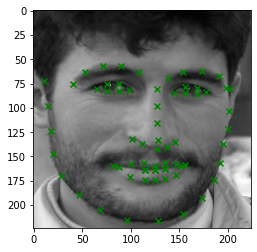

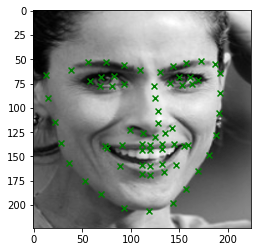

In [58]:
show_keypoints(training_set3[2][0], training_set3[2][1])
show_keypoints(training_set3[134][0], training_set3[134][1])

  0%|          | 0/1 [00:00<?, ?it/s]

batch0 0.0035050243604928255


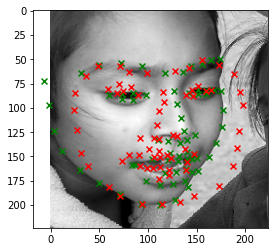

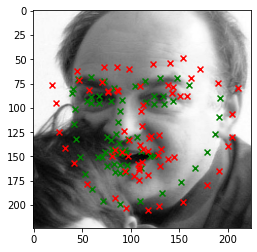

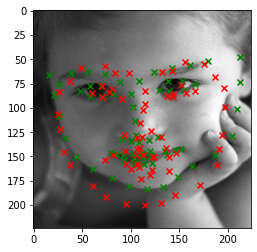

batch1 0.0036620667669922113


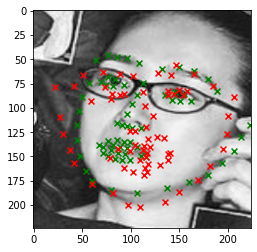

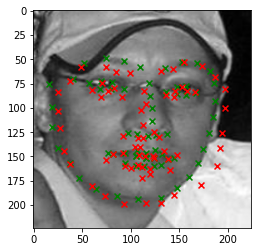

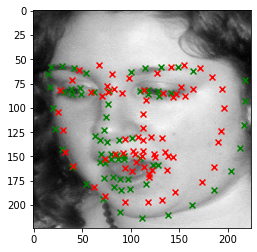

batch2 0.0035848880652338266


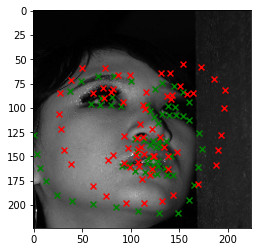

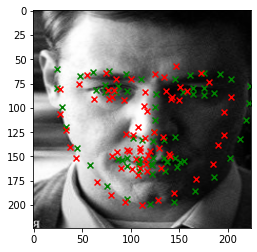

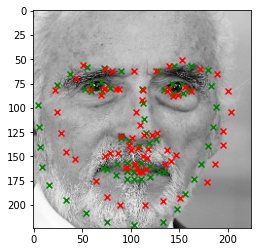

100%|██████████| 1/1 [04:28<00:00, 268.60s/it]


0.0106520869594533


In [61]:
# Training and Testing
model3 = cnn.ResNet()
epochs = 10
learn_rate = 3e-4
show_every = 1

train_loss3, valid_loss3 = train_and_validate(
    train_loader3, valid_loader3, model3, epochs, learn_rate, show_every
)

In [ ]:
# Plot training and validation loss progress
show_progress(train_loss3)
show_progress(valid_loss3)

In [63]:
results3 = test(test_loader3, model3)

In [66]:
test_imgs3, test_preds3 = torch.stack(results3[0]), torch.stack(results3[1])